In [387]:
import numpy as np
import pandas as pd
import requests
import json
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import kaleido
import plotly

## Define search engine version

In [388]:
if "SEARCH_VERSION" not in locals():
    SEARCH_VERSION = "new"
else:
    print(SEARCH_VERSION)

2.2


In [389]:
SEARCH_VERSION

2.2

## Import lastest elastic data

In [390]:
df_test = pd.read_csv("./data/elastic_wars.csv", dtype=str)

In [391]:
df_test.drop([911], axis=0, inplace=True)

In [392]:
df_test.head(3)

,terms,siren,results_elastic_1.1,pages_elastic_1.1,siren_elastic_1.1,resp_time_elastic_1.1,rank_elastic_1.1,results_elastic_2.0,pages_elastic_2.0,siren_elastic_2.0,resp_time_elastic_2.0,rank_elastic_2.0
0,stellantis,879786085,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.042709,0,2007.0,101.0,"['879786085', '897940953', '912425493', '91005...",0.044964,0
1,STELLANTIS,879786085,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.041482,0,2007.0,101.0,"['879786085', '897940953', '912425493', '91005...",0.046229,0
2,Stellantis,879786085,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.040855,0,2007.0,101.0,"['879786085', '897940953', '912425493', '91005...",0.047226,0


In [393]:
df_test.columns

Index(['terms', 'siren', 'results_elastic_1.1', 'pages_elastic_1.1',
       'siren_elastic_1.1', 'resp_time_elastic_1.1', 'rank_elastic_1.1',
       'results_elastic_2.0', 'pages_elastic_2.0', 'siren_elastic_2.0',
       'resp_time_elastic_2.0', 'rank_elastic_2.0'],
      dtype='object')

In [394]:
df_test.shape

(926, 12)

In [395]:
df_test.dtypes

terms                    object
siren                    object
results_elastic_1.1      object
pages_elastic_1.1        object
siren_elastic_1.1        object
resp_time_elastic_1.1    object
rank_elastic_1.1         object
results_elastic_2.0      object
pages_elastic_2.0        object
siren_elastic_2.0        object
resp_time_elastic_2.0    object
rank_elastic_2.0         object
dtype: object

## Call last search functions (maybe add description)

In [396]:
def find(key, dictionary):
    for k, v in dictionary.items():
        if k == key:
            yield v
        elif isinstance(v, dict):
            for result in find(key, v):
                yield result
        elif isinstance(v, list):
            for d in v:
                for result in find(key, d):
                    yield result

In [397]:
def get_response(url, q):
    params["q"] = q
    response = requests.get(url, params=params)
    time_elapsed = response.elapsed.total_seconds()
    content = json.loads(response.content)
    total_results = content["total_results"]
    total_pages = content["total_pages"]
    siren_list = [unite["siren"] for unite in content["results"]]
    return total_results, total_pages, siren_list, time_elapsed

In [398]:
url_elastic = "http://api.sirene.dataeng.etalab.studio/search"

In [399]:
# Get first 20 results
params = {"q": "", "page": "1", "per_page": "20"}

In [400]:
(
    df_test[f"results_elastic_{SEARCH_VERSION}"],
    df_test[f"pages_elastic_{SEARCH_VERSION}"],
    df_test[f"siren_elastic_{SEARCH_VERSION}"],
    df_test[f"resp_time_elastic_{SEARCH_VERSION}"],
) = ("", "", "", "")

In [401]:
df_test.columns

Index(['terms', 'siren', 'results_elastic_1.1', 'pages_elastic_1.1',
       'siren_elastic_1.1', 'resp_time_elastic_1.1', 'rank_elastic_1.1',
       'results_elastic_2.0', 'pages_elastic_2.0', 'siren_elastic_2.0',
       'resp_time_elastic_2.0', 'rank_elastic_2.0', 'results_elastic_2.2',
       'pages_elastic_2.2', 'siren_elastic_2.2', 'resp_time_elastic_2.2'],
      dtype='object')

In [402]:
df_test.head(3)

,terms,siren,results_elastic_1.1,pages_elastic_1.1,siren_elastic_1.1,resp_time_elastic_1.1,rank_elastic_1.1,results_elastic_2.0,pages_elastic_2.0,siren_elastic_2.0,resp_time_elastic_2.0,rank_elastic_2.0,results_elastic_2.2,pages_elastic_2.2,siren_elastic_2.2,resp_time_elastic_2.2
0,stellantis,879786085,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.042709,0,2007.0,101.0,"['879786085', '897940953', '912425493', '91005...",0.044964,0,,,,
1,STELLANTIS,879786085,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.041482,0,2007.0,101.0,"['879786085', '897940953', '912425493', '91005...",0.046229,0,,,,
2,Stellantis,879786085,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.040855,0,2007.0,101.0,"['879786085', '897940953', '912425493', '91005...",0.047226,0,,,,


In [403]:
for index, row in df_test.iterrows():
    (
        df_test[f"results_elastic_{SEARCH_VERSION}"][index],
        df_test[f"pages_elastic_{SEARCH_VERSION}"][index],
        df_test[f"siren_elastic_{SEARCH_VERSION}"][index],
        df_test[f"resp_time_elastic_{SEARCH_VERSION}"][index],
    ) = get_response(url_elastic, row["terms"])
    if index % 5 == 0: 
        time.sleep(0.5)

In [404]:
df_test

,terms,siren,results_elastic_1.1,pages_elastic_1.1,siren_elastic_1.1,resp_time_elastic_1.1,rank_elastic_1.1,results_elastic_2.0,pages_elastic_2.0,siren_elastic_2.0,resp_time_elastic_2.0,rank_elastic_2.0,results_elastic_2.2,pages_elastic_2.2,siren_elastic_2.2,resp_time_elastic_2.2
0,stellantis,879786085,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.042709,0,2007.0,101.0,"['879786085', '897940953', '912425493', '91005...",0.044964,0,7,1,"[879786085, 897921219, 897940953, 912425493, 5...",0.177897
1,STELLANTIS,879786085,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.041482,0,2007.0,101.0,"['879786085', '897940953', '912425493', '91005...",0.046229,0,7,1,"[879786085, 897921219, 897940953, 912425493, 5...",0.088447
2,Stellantis,879786085,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.040855,0,2007.0,101.0,"['879786085', '897940953', '912425493', '91005...",0.047226,0,7,1,"[879786085, 897921219, 897940953, 912425493, 5...",0.174291
3,air france,420495178,1177.0,59.0,"['420495178', '632041042', '314119504', '37800...",0.06589,0,1834.0,92.0,"['420495178', '632041042', '775740822', '31411...",0.055818,0,1664,84,"[420495178, 632041042, 775740822, 314119504, 7...",0.261469
4,Air france,420495178,1177.0,59.0,"['420495178', '632041042', '314119504', '37800...",0.077272,0,1834.0,92.0,"['420495178', '632041042', '775740822', '31411...",0.062533,0,1664,84,"[420495178, 632041042, 775740822, 314119504, 7...",0.204287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,pontecaille gregoire,818452476,1.0,1.0,['818452476'],0.043938,0,1.0,1.0,['818452476'],0.064046,0,2,1,"[818452476, 484266358]",0.024387
923,sherpa,393825229,3028.0,152.0,"['801698242', '515198844', '449614189', '53166...",0.037458,6,860.0,43.0,"['801698242', '334075736', '515198844', '52477...",0.055922,-1,393,20,"[801698242, 334075736, 515198844, 524772977, 4...",0.055141
924,sherpa,500913785,3028.0,152.0,"['801698242', '515198844', '449614189', '53166...",0.037149,8,860.0,43.0,"['801698242', '334075736', '515198844', '52477...",0.050349,6,393,20,"[801698242, 334075736, 515198844, 524772977, 4...",0.043145
925,mc animation,820552925,9.0,1.0,"['820552925', '440736965', '398015974', '52854...",0.018714,0,7.0,1.0,"['820552925', '440736965', '480011089', '66202...",0.069025,0,7,1,"[820552925, 440736965, 480011089, 662025196, 3...",0.035558


In [405]:
elastic_columns = [
    col
    for col in df_test.columns
    if "elastic" in col and ("result" in col or "pages" in col or "resp_time" in col)
]

In [406]:
elastic_columns

['results_elastic_1.1',
 'pages_elastic_1.1',
 'resp_time_elastic_1.1',
 'results_elastic_2.0',
 'pages_elastic_2.0',
 'resp_time_elastic_2.0',
 'results_elastic_2.2',
 'pages_elastic_2.2',
 'resp_time_elastic_2.2']

In [407]:
for col in elastic_columns:
    df_test[col] = df_test[col].astype("float64")

In [408]:
df_test.dtypes

terms                     object
siren                     object
results_elastic_1.1      float64
pages_elastic_1.1        float64
siren_elastic_1.1         object
resp_time_elastic_1.1    float64
rank_elastic_1.1          object
results_elastic_2.0      float64
pages_elastic_2.0        float64
siren_elastic_2.0         object
resp_time_elastic_2.0    float64
rank_elastic_2.0          object
results_elastic_2.2      float64
pages_elastic_2.2        float64
siren_elastic_2.2         object
resp_time_elastic_2.2    float64
dtype: object

In [409]:
df_test.describe()

,results_elastic_1.1,pages_elastic_1.1,resp_time_elastic_1.1,results_elastic_2.0,pages_elastic_2.0,resp_time_elastic_2.0,results_elastic_2.2,pages_elastic_2.2,resp_time_elastic_2.2
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,1236.892009,62.518359,0.046416,1194.570194,60.246220,0.058665,374.285097,19.294816,0.062578
std,2890.771044,144.602842,0.023667,2769.740271,138.350459,0.027887,1529.124800,76.371146,0.050369
min,0.000000,1.000000,0.009341,0.000000,0.000000,0.011567,0.000000,0.000000,0.005228
25%,3.250000,1.000000,0.031400,5.000000,1.000000,0.041017,3.000000,1.000000,0.023860
50%,25.000000,2.000000,0.040901,28.500000,2.000000,0.053509,12.500000,1.000000,0.051354
75%,269.000000,14.000000,0.055134,373.000000,19.000000,0.072369,65.750000,4.000000,0.085972
max,10000.000000,501.000000,0.164046,10000.000000,500.000000,0.198341,10000.000000,500.000000,0.435656


In [410]:
df_test.describe().to_csv(
    f"./output/describe/describe_{SEARCH_VERSION}.csv", header=True, index=True
)

## Ranks

In [411]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = ""

In [412]:
for ind, row in df_test.iterrows():
    if str(row["siren"]) in row[f"siren_elastic_{SEARCH_VERSION}"]:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = row[
            f"siren_elastic_{SEARCH_VERSION}"
        ].index(str(row["siren"]))
    else:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = -1

In [413]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = df_test[
    f"rank_elastic_{SEARCH_VERSION}"
].astype("int32")

## KPIs

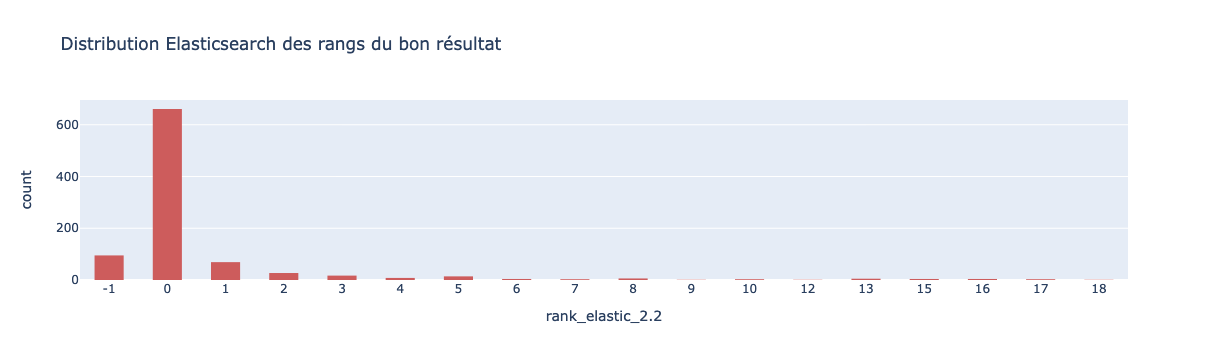

'./output/plots/rank_2.2.html'

In [414]:
fig = px.histogram(
    df_test.sort_values(by=[f"rank_elastic_{SEARCH_VERSION}"]),
    x=f"rank_elastic_{SEARCH_VERSION}",
    color_discrete_sequence=["indianred"],
    title="Distribution Elasticsearch des rangs du bon résultat",
)
fig.update_layout(bargap=0.5)
fig.update_xaxes(type="category")
fig.show()
plotly.offline.plot(fig, filename=f"./output/plots/rank_{SEARCH_VERSION}.html")

In [415]:
rank_columns = [col for col in df_test.columns if "rank_elastic" in col]

In [416]:
rank_columns

['rank_elastic_1.1', 'rank_elastic_2.0', 'rank_elastic_2.2']

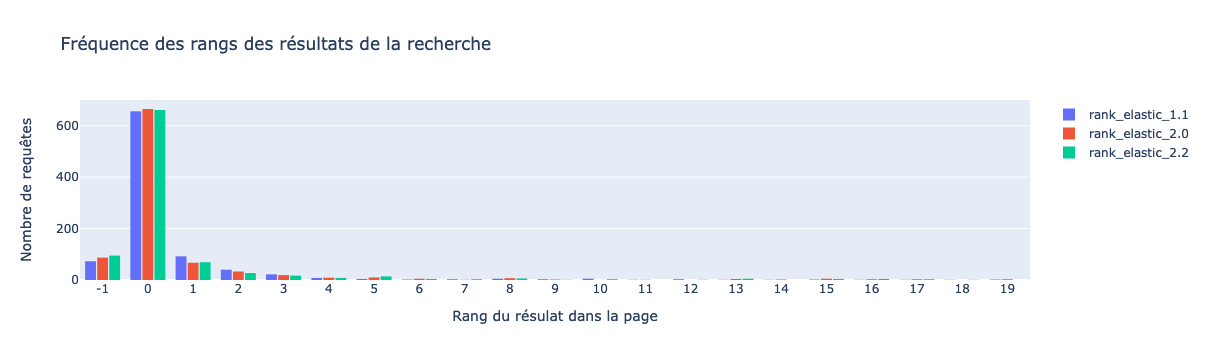

'./output/plots/rank_war_2.2.html'

In [417]:
fig = go.Figure()
rank_dict = {}
for rank in rank_columns:
    df_test[rank] = df_test[rank].astype("int32")
    rank_dict[rank] = df_test.sort_values(by=[rank])[rank]
    fig.add_trace(
        go.Histogram(
            histfunc="count",
            x=rank_dict[rank],
            name=rank,
        )
    )
fig.update_layout(
    title_text="Fréquence des rangs des résultats de la recherche",  # title of plot
    xaxis_title_text="Rang du résulat dans la page",  # xaxis label
    yaxis_title_text="Nombre de requêtes",  # yaxis label
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1,  # gap between bars of the same location coordinates
)
fig.update_xaxes(type="category")
fig.show()
# fig.write_image(f"./output/plots/rank_{SEARCH_VERSION}.png")
plotly.offline.plot(fig, filename=f"./output/plots/rank_war_{SEARCH_VERSION}.html")

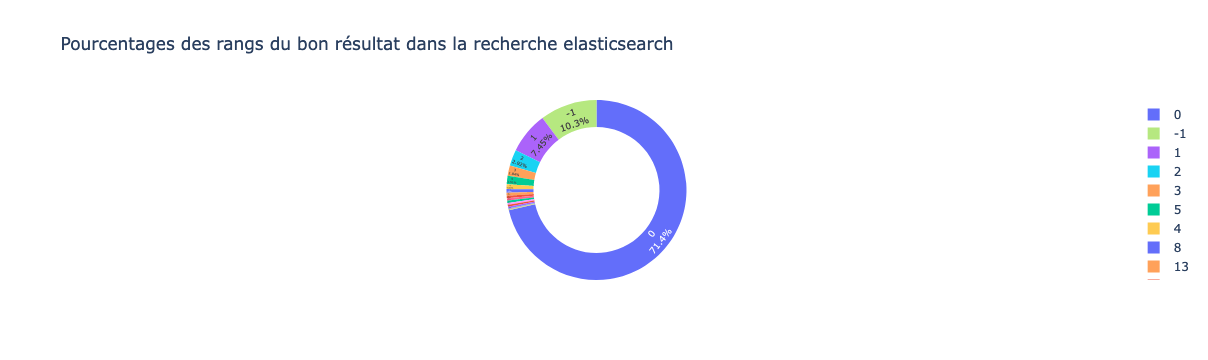

'./output/plots/pie_2.2.html'

In [420]:
fig = px.pie(
    df_test,
    names=rank_columns[-1],
    hole=0.7,
    color=rank_columns[-1],
    title="Pourcentages des rangs du bon résultat dans la recherche elasticsearch",
)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()
plotly.offline.plot(fig, filename=f"./output/plots/pie_{SEARCH_VERSION}.html")

### Nombre maximale de requête


In [421]:
df_max = (
    df_test[f"results_elastic_{SEARCH_VERSION}"].value_counts(normalize=True) * 100
).reset_index()
df_max[df_max["index"] == "10000.0"].to_csv(
    f"./output/describe/max_requetes_{SEARCH_VERSION}.csv", header=True, index=True
)
df_max[df_max["index"] == "10000.0"]

,index,results_elastic_2.2


### Sauvegarder les dataframes

In [422]:
df_test.to_csv(f"./data/elastic_wars_{SEARCH_VERSION}.csv", header=True, index=False)

In [423]:
elastic_columns = [col for col in df_test.columns if "elastic" in col]
columns_to_save = ["terms", "siren"]
columns_to_save = columns_to_save + elastic_columns[-10:]
columns_to_save

['terms',
 'siren',
 'results_elastic_2.0',
 'pages_elastic_2.0',
 'siren_elastic_2.0',
 'resp_time_elastic_2.0',
 'rank_elastic_2.0',
 'results_elastic_2.2',
 'pages_elastic_2.2',
 'siren_elastic_2.2',
 'resp_time_elastic_2.2',
 'rank_elastic_2.2']

In [424]:
df_test.to_csv(
    f"./data/elastic_wars.csv", header=True, index=False, columns=columns_to_save
)

In [425]:
!touch tutu.txt